# What is classification ?

- Import the data you'll be using
- Visualize/Analyze your dataset
- Perform classification on it

### 1.a -  We use the mnist dataset

In [36]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print "input of training set has shape {} and output has shape {}".format(x_train.shape, y_train.shape)
print "input of testing set has shape {} and output has shape {}".format(x_test.shape, y_test.shape)

input of training set has shape (60000, 28, 28) and output has shape (60000,)
input of testing set has shape (10000, 28, 28) and output has shape (10000,)


### 1.b - How does Mnist look like ?

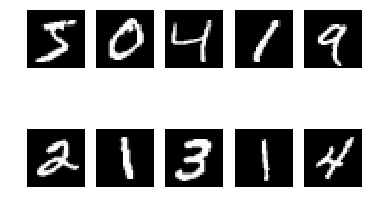

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(2,5)
axs = [b for a in axs for b in a]
for i in range(2*5):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].axis('off')
plt.show()

### 1.c - Distribution of the Mnist dataset

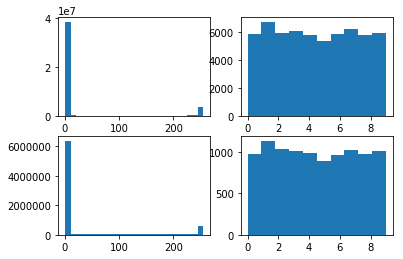

In [38]:
fig, axs = plt.subplots(2,2)
axs[0][0].hist(x_train.reshape([-1]), bins = 25)
axs[0][1].hist(y_train.reshape([-1]), bins = 10)
axs[1][0].hist(x_test.reshape([-1]), bins = 25)
axs[1][1].hist(y_test.reshape([-1]), bins = 10)
plt.show()

### 1.c - Normalize and change the encoding of the data

In [39]:
# Normalize the MNIST data
x_train = x_train/255.
x_test = x_test/255.

# Change the one-hot-encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

---
### 2 - Classify our data

We are going to choose in between 3 classifier to classify our data:

- SVM
- Nearest Neighboor
- Logistic Regression

### 2.a - SVM

https://www.youtube.com/watch?v=_PwhiWxHK8o

In [40]:
from sklearn import svm
from skimage.transform import resize

# 24*24 images'll be too big, we downsample them to 8*8
def to_svm_image(img):
    img = resize(img, [8,8])
    return img.reshape([-1])

x_train_svm = map(to_svm_image, x_train)
x_train_svm = np.array(x_train_svm)

# Train the classifier here
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(x_train_svm, y_train.argmax(axis=1))

# Test the classifier
sample = to_svm_image(x_test[0])
sample = sample.reshape([1,-1])
clf.predict(sample)

array([7])

###  2.b - Nearest neighboor

Browse throught the entire dataset which is the closest "neighboor" to our current example.

In [17]:
sample = x_test[0]

def distance(tensor1, tensor2, norm='l1'):
    if norm == "l1":
        dist = np.abs(tensor1 - tensor2)
    if norm == "l2":
        dist = tensor1 ** 2 - tensor2 ** 2
    dist = np.sum(dist)
    return dist

def predict(sample, norm='l1'):
    min_dist = 100000000000
    min_idx = -1
    for idx, im in enumerate(x_train):
        if dist(sample, im) < min_dist:
            min_dist = distance(sample, im, norm)
            min_idx = idx
    y_pred = y_train[min_idx]     
    return y_pred

y = predict(sample, 'l1')
print "sample is closest to class {}".format(y)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


sample is closest to class [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


### 2.c - Logistic regression

$ y = W^T \cdot X $

In [44]:
from sklearn import linear_model, datasetsœ
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

print x_train.shape

# Train the classifier here
clf_sgd = SGDClassifier()
clf_sgd.fit(x_train_svm, y_train.argmax(axis=1))

# Test the classifier
sample = to_svm_image(x_test[0])
sample = sample.reshape([1,-1])
clf.predict(sample)

(60000, 28, 28)


array([7])